In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx = 81  # Number of grid points in x direction
ny = 81  # Number of grid points in y direction
nt = 100  # Number of time steps
dx = 2 / (nx - 1)  # Spatial step in x direction  
dy = 2 / (ny - 1)  # Spatial step in y direction
x = np.linspace(0, 2, nx)  # X coordinates
y = np.linspace(0, 2, ny)  # Y coordinates


In [3]:
u = np.zeros((ny, nx))  # X velocity component
v = np.zeros((ny, nx))  # Y velocity component
p = np.zeros((ny, nx))  # Pressure

In [4]:
u[:, -1] = 1  # Set the lid velocity to 1

In [5]:
def solve_ns(u, v, p, dx, dy, dt):
    un = u.copy()
    vn = v.copy()
    
    # Compute intermediate velocity field
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] - 
                     un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                           dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                           dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
    
    # Solve pressure Poisson equation
    p = np.zeros((ny, nx))
    p[1:-1, 1:-1] = (((p[1:-1, 2:] + p[1:-1, 0:-2]) * dy**2 + 
                      (p[2:, 1:-1] + p[0:-2, 1:-1]) * dx**2) /
                     (2 * (dx**2 + dy**2)) -
                     dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                     ((u[1:-1, 2:] - u[1:-1, 0:-2]) / dx +
                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / dy))
    
    # Update velocity field
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                           dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                           dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
    
    return u, v, p

In [6]:
nu = 0.01  # Kinematic viscosity
rho = 1    # Density
dt = 0.001 # Time step

for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    u, v, p = solve_ns(u, v, p, dx, dy, dt)
    
    # Apply boundary conditions
    u[:, -1] = 1
    u[:, 0] = 0
    u[0, :] = 0 
    u[-1, :] = 0
    v[:, -1] = 0
    v[:, 0] = 0  
    v[0, :] = 0
    v[-1, :] = 0

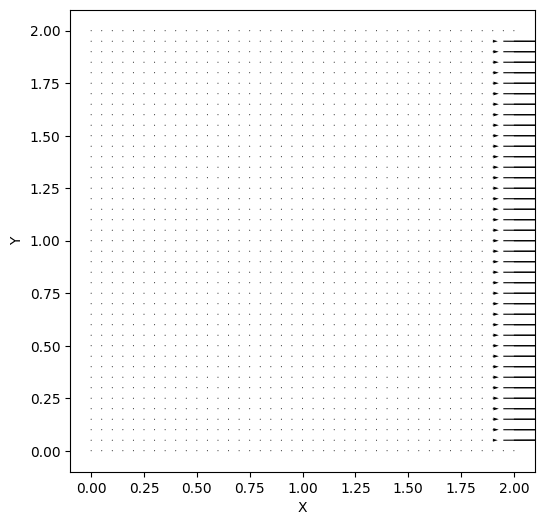

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(x[::2], y[::2], u[::2, ::2], v[::2, ::2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

TypeError: 'float' object is not subscriptable

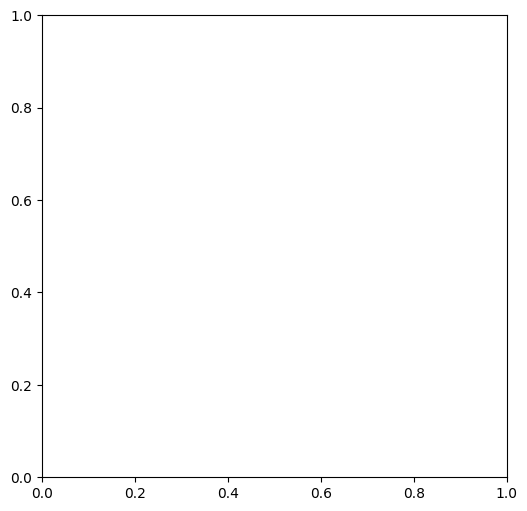

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the computational domain and parameters
nx = 81  # Number of grid points in x direction
ny = 81  # Number of grid points in y direction  
nt = 100  # Number of time steps
dx = 2 / (nx - 1)  # Spatial step in x direction
dy = 2 / (ny - 1)  # Spatial step in y direction
x = np.linspace(0, 2, nx)  # X coordinates
y = np.linspace(0, 2, ny)  # Y coordinates

# Initialize arrays for the velocity components and pressure
u = np.zeros((ny, nx))  # X velocity component
v = np.zeros((ny, nx))  # Y velocity component
p = np.zeros((ny, nx))  # Pressure

# Set the boundary conditions (e.g. lid-driven cavity flow)
u[:, -1] = 1  # Set the lid velocity to 1

# Define the circle geometry
circle_x = 1  # X-coordinate of circle center
circle_y = 1  # Y-coordinate of circle center
circle_r = 0.25  # Radius of the circle

# Create a mask to identify fluid and solid cells
mask = np.zeros((ny, nx), dtype=bool)
for i in range(ny):
    for j in range(nx):
        x = j * dx
        y = i * dy
        if (x - circle_x)**2 + (y - circle_y)**2 > circle_r**2:
            mask[i, j] = True

def solve_ns(u, v, p, dx, dy, dt):
    un = u.copy()
    vn = v.copy()
    
    # Compute intermediate velocity field
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] - 
                     un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                           dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                           dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
    
    # Solve pressure Poisson equation
    p = np.zeros((ny, nx))
    p[1:-1, 1:-1] = (((p[1:-1, 2:] + p[1:-1, 0:-2]) * dy**2 + 
                      (p[2:, 1:-1] + p[0:-2, 1:-1]) * dx**2) /
                     (2 * (dx**2 + dy**2)) -
                     dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                     ((u[1:-1, 2:] - u[1:-1, 0:-2]) / dx +
                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / dy))
    
    # Update velocity field
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                           dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                           dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
    
    return u, v, p

nu = 0.01  # Kinematic viscosity
rho = 1    # Density
dt = 0.001 # Time step

for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    u, v, p = solve_ns(u, v, p, dx, dy, dt)
    
    # Apply boundary conditions
    u[:, -1] = 1
    u[:, 0] = 0
    u[0, :] = 0 
    u[-1, :] = 0
    v[:, -1] = 0
    v[:, 0] = 0  
    v[0, :] = 0
    v[-1, :] = 0
    
    # Apply boundary conditions for the circle
    for i in range(ny):
        for j in range(nx):
            if not mask[i, j]:
                u[i, j] = 0
                v[i, j] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(x[::2], y[::2], u[::2, ::2], v[::2, ::2])
circle = plt.Circle((circle_x, circle_y), circle_r, color='r', fill=False)
ax.add_artist(circle)
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()